# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.105748e+01     7.724326e+00
 * time: 0.003921031951904297
     1     2.914266e+01     4.990196e+00
 * time: 0.018095016479492188
     2     1.985759e+01     5.391864e+00
 * time: 0.03566908836364746
     3     1.513987e+01     5.457289e+00
 * time: 0.05300593376159668
     4     1.106901e+01     2.107481e+00
 * time: 0.07042908668518066
     5     1.094643e+01     3.857405e+00
 * time: 0.08441901206970215
     6     1.011605e+01     1.749660e+00
 * time: 0.09845399856567383
     7     9.379818e+00     1.946252e+00
 * time: 0.11244797706604004
     8     8.991327e+00     1.810340e+00
 * time: 0.1263561248779297
     9     8.886418e+00     1.903284e+00
 * time: 0.1369919776916504
    10     8.880856e+00     2.111806e+00
 * time: 0.1475660800933838
    11     8.667343e+00     9.115477e-01
 * time: 0.1615760326385498
    12     8.399090e+00     1.000519e+00
 * time: 0.1760239601135254
    13     8.389418e+00     1.212251e+00
 * time: 0.

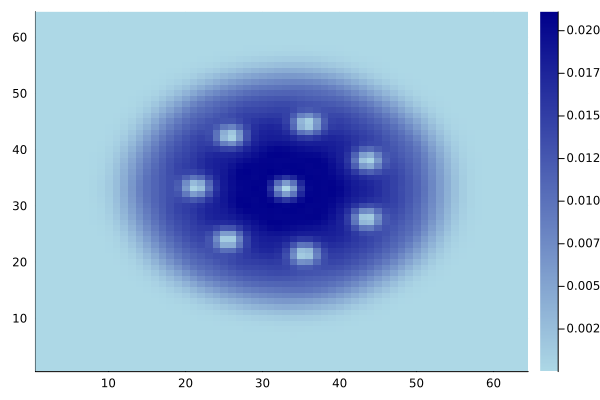

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)